# **Import and Read Train Data for Cleaning**

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

pd.set_option('display.max_columns', 100)
sns.set(style="whitegrid")

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print("Train shape:", train.shape)
print("Test shape:", test.shape)
train.head()


Train shape: (20000, 17)
Test shape: (12000, 16)


,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage,wind_speed,pressure,string_id,error_code,installation_type,efficiency
0,0,7.817315,576.179270,41.24308670850264,32.135501,4.0,0.803199,37.403527,1.963787,13.691147,62.494044,12.82491203459621,1018.8665053152533,A1,NaN,NaN,0.562096
1,1,24.785727,240.003973,1.3596482765960705,19.977460,8.0,0.479456,21.843315,0.241473,27.545096,43.851238,12.012043660984917,1025.6238537572883,D4,E00,dual-axis,0.396447
2,2,46.652695,687.612799,91.26536837560256,1.496401,4.0,0.822398,48.222882,4.191800,43.363708,NaN,1.814399755560454,1010.9226539809573,C3,E00,NaN,0.573776
3,3,53.339567,735.141179,96.19095521176159,18.491582,3.0,0.837529,46.295748,0.960567,57.720436,67.361473,8.736258932034128,1021.8466633134253,A1,NaN,dual-axis,0.629009
4,4,5.575374,12.241203,27.495073003585226,30.722697,6.0,0.551833,0.000000,0.898062,6.786263,3.632000,0.52268384077164,1008.5559577591927,B2,E00,fixed,0.341874


In [82]:
train.head(5)

,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage,wind_speed,pressure,string_id,error_code,installation_type,efficiency
0,0,7.817315,576.179270,41.24308670850264,32.135501,4.0,0.803199,37.403527,1.963787,13.691147,62.494044,12.82491203459621,1018.8665053152533,A1,NaN,NaN,0.562096
1,1,24.785727,240.003973,1.3596482765960705,19.977460,8.0,0.479456,21.843315,0.241473,27.545096,43.851238,12.012043660984917,1025.6238537572883,D4,E00,dual-axis,0.396447
2,2,46.652695,687.612799,91.26536837560256,1.496401,4.0,0.822398,48.222882,4.191800,43.363708,NaN,1.814399755560454,1010.9226539809573,C3,E00,NaN,0.573776
3,3,53.339567,735.141179,96.19095521176159,18.491582,3.0,0.837529,46.295748,0.960567,57.720436,67.361473,8.736258932034128,1021.8466633134253,A1,NaN,dual-axis,0.629009
4,4,5.575374,12.241203,27.495073003585226,30.722697,6.0,0.551833,0.000000,0.898062,6.786263,3.632000,0.52268384077164,1008.5559577591927,B2,E00,fixed,0.341874


In [83]:
print(train.dtypes[:])

id                      int64
temperature           float64
irradiance            float64
humidity               object
panel_age             float64
maintenance_count     float64
soiling_ratio         float64
voltage               float64
current               float64
module_temperature    float64
cloud_coverage        float64
wind_speed             object
pressure               object
string_id              object
error_code             object
installation_type      object
efficiency            float64
dtype: object


In [84]:
train.info()
train.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20000 non-null  int64  
 1   temperature         18999 non-null  float64
 2   irradiance          19013 non-null  float64
 3   humidity            20000 non-null  object 
 4   panel_age           18989 non-null  float64
 5   maintenance_count   18973 non-null  float64
 6   soiling_ratio       18990 non-null  float64
 7   voltage             19007 non-null  float64
 8   current             19023 non-null  float64
 9   module_temperature  19022 non-null  float64
 10  cloud_coverage      18990 non-null  float64
 11  wind_speed          20000 non-null  object 
 12  pressure            20000 non-null  object 
 13  string_id           20000 non-null  object 
 14  error_code          14088 non-null  object 
 15  installation_type   14972 non-null  object 
 16  effi

,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage,wind_speed,pressure,string_id,error_code,installation_type,efficiency
count,20000.000000,18999.000000,19013.000000,20000,18989.000000,18973.000000,18990.000000,19007.000000,19023.000000,19022.000000,18990.000000,20000,20000,20000,14088,14972,20000.000000
unique,NaN,NaN,NaN,19876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19884,19868,4,3,3,NaN
top,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,badval,unknown,D4,E00,tracking,NaN
freq,NaN,NaN,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,46,5080,5977,5067,NaN
mean,9999.500000,25.077241,501.273896,NaN,17.509758,4.012070,0.698879,16.242251,1.713396,29.923807,51.378575,NaN,NaN,NaN,NaN,NaN,0.510260
std,5773.647028,12.513129,250.926590,NaN,10.097557,2.002268,0.172244,17.889031,1.152953,12.125405,48.473664,NaN,NaN,NaN,NaN,NaN,0.140420
min,0.000000,0.000000,-597.278646,NaN,0.001264,0.000000,0.400149,0.000000,0.000054,0.000000,0.000244,NaN,NaN,NaN,NaN,NaN,0.000000
25%,4999.750000,16.853522,332.227277,NaN,8.777905,3.000000,0.550654,0.000000,0.772311,21.522124,25.081618,NaN,NaN,NaN,NaN,NaN,0.445613
50%,9999.500000,24.720345,499.654730,NaN,17.497731,4.000000,0.697663,12.350138,1.558413,29.857669,49.704133,NaN,NaN,NaN,NaN,NaN,0.515709
75%,14999.250000,32.848917,668.416734,NaN,26.340761,5.000000,0.847838,26.557322,2.474744,38.094943,75.052824,NaN,NaN,NaN,NaN,NaN,0.590324


In [85]:
# Missing values
missing = train.isnull().sum()
print(missing)

id                       0
temperature           1001
irradiance             987
humidity                 0
panel_age             1011
maintenance_count     1027
soiling_ratio         1010
voltage                993
current                977
module_temperature     978
cloud_coverage        1010
wind_speed               0
pressure                 0
string_id                0
error_code            5912
installation_type     5028
efficiency               0
dtype: int64


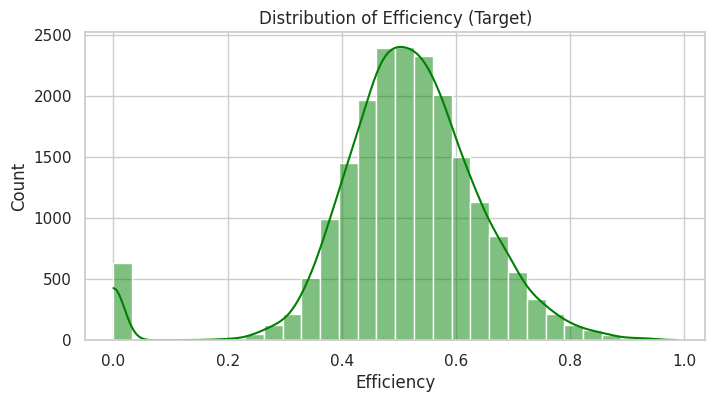

In [86]:
plt.figure(figsize=(8, 4))
sns.histplot(train["efficiency"], kde=True, bins=30, color="green")
plt.title("Distribution of Efficiency (Target)")
plt.xlabel("Efficiency")
plt.show()


string_id value counts:
 string_id
D4    5080
B2    5014
C3    5004
A1    4902
Name: count, dtype: int64


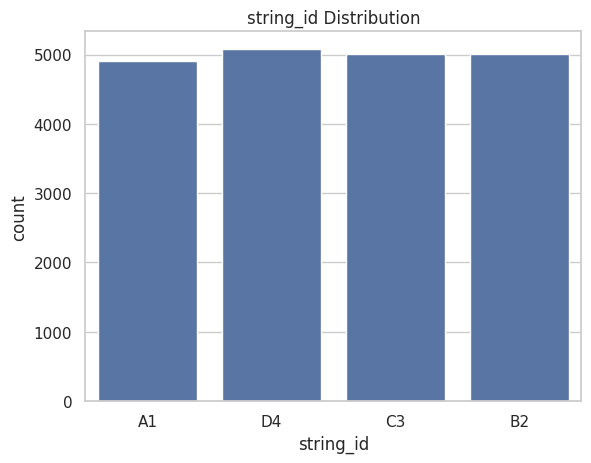


error_code value counts:
 error_code
E00    5977
E01    4100
E02    4011
Name: count, dtype: int64


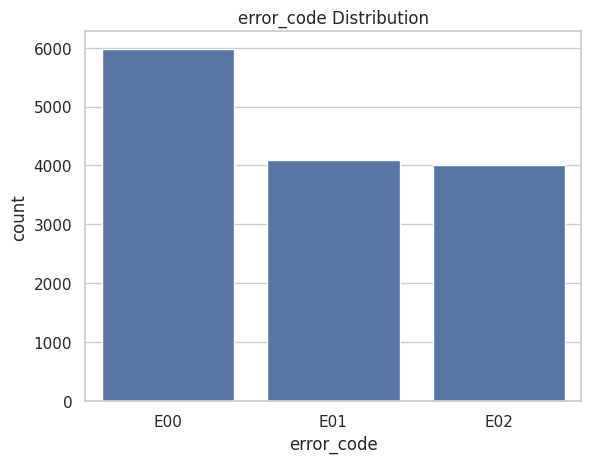


installation_type value counts:
 installation_type
tracking     5067
fixed        4990
dual-axis    4915
Name: count, dtype: int64


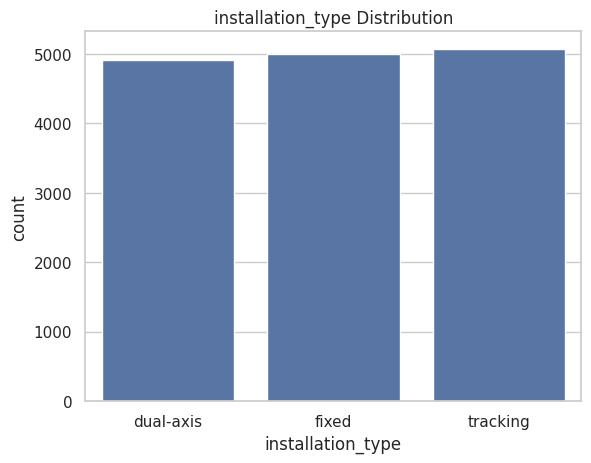

In [87]:
cat_features = ['string_id', 'error_code', 'installation_type']
for col in cat_features:
    print(f"\n{col} value counts:\n", train[col].value_counts())
    sns.countplot(data=train, x=col)
    plt.xticks(rotation=0)
    plt.title(f"{col} Distribution")
    plt.show()


In [88]:
num_cols = ['temperature', 'irradiance', 'humidity', 'panel_age', 'soiling_ratio',
            'voltage', 'current', 'module_temperature', 'cloud_coverage',
            'wind_speed', 'pressure']

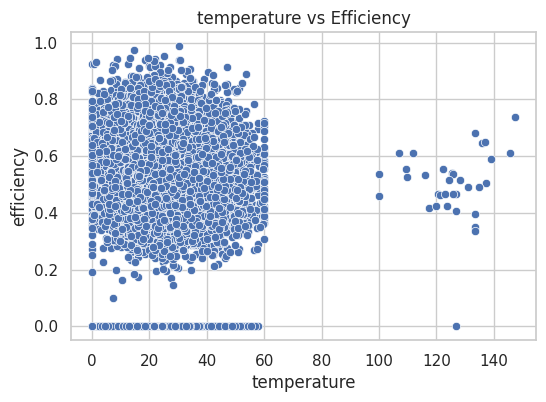

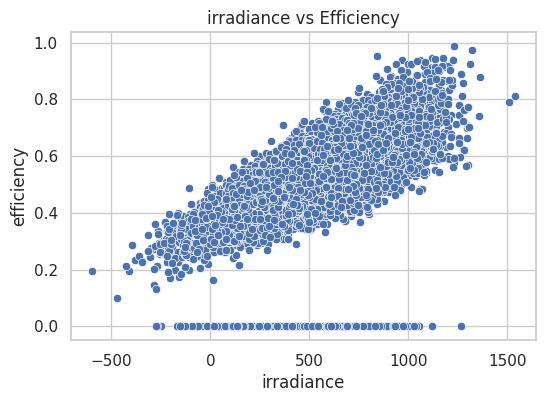

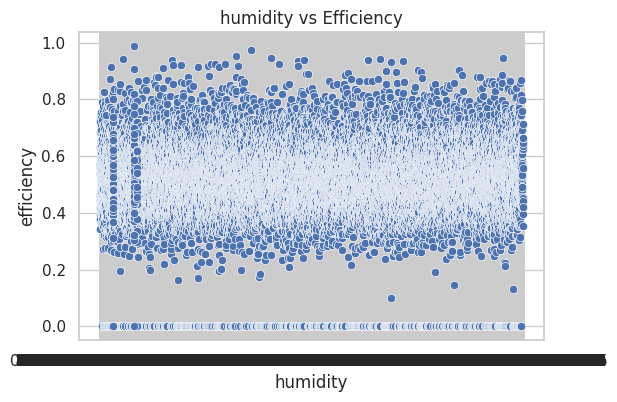

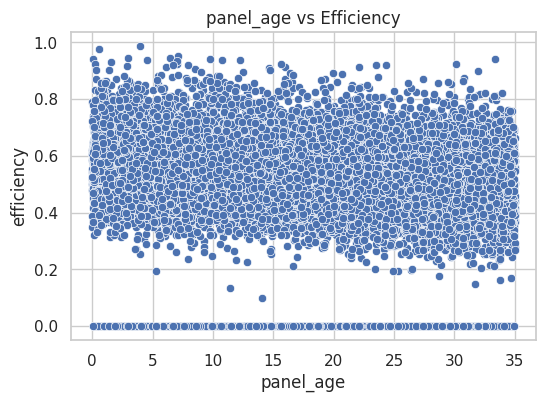

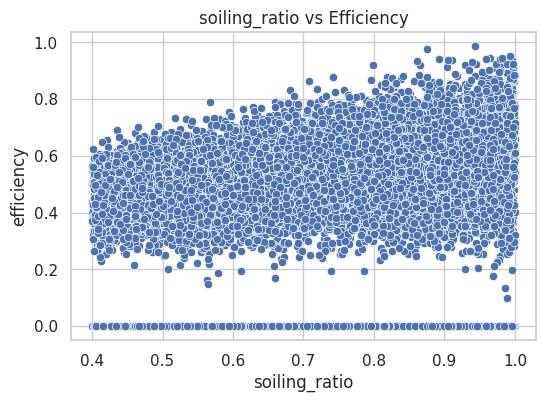

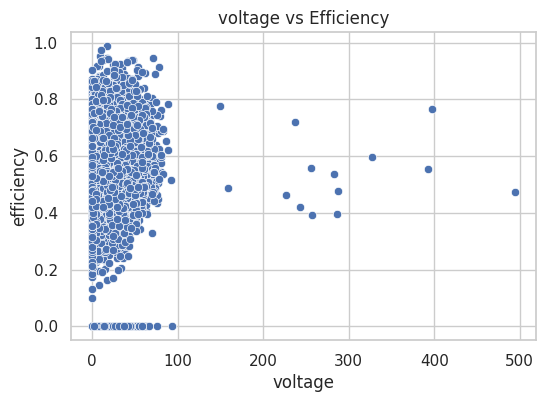

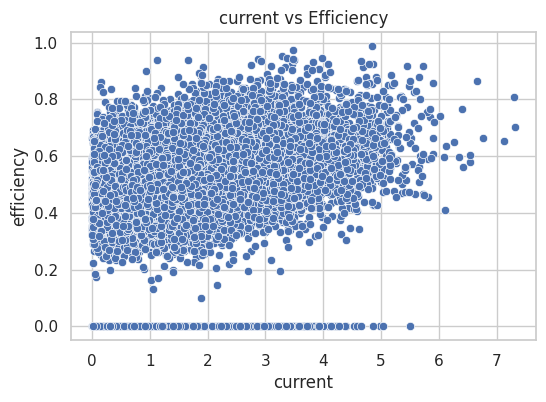

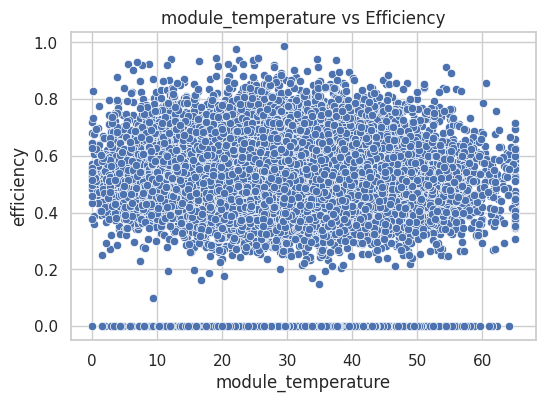

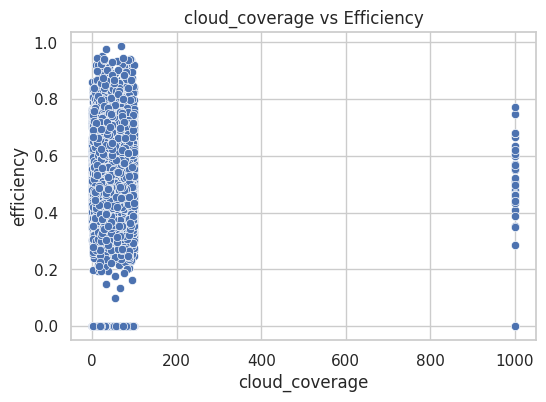

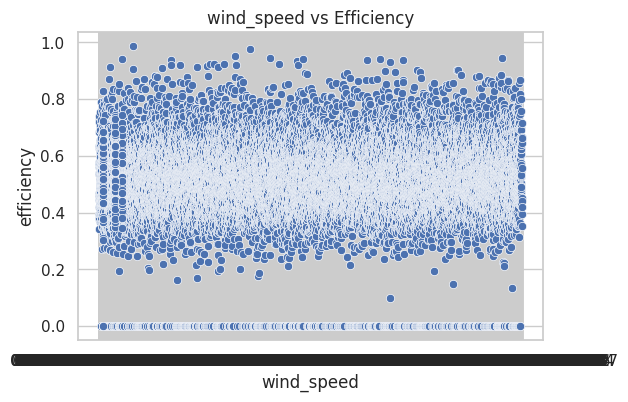

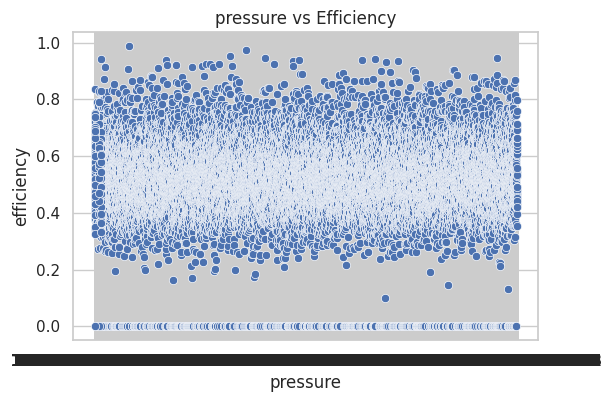

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=train, x=col, y='efficiency')
    plt.title(f"{col} vs Efficiency")
    plt.show()


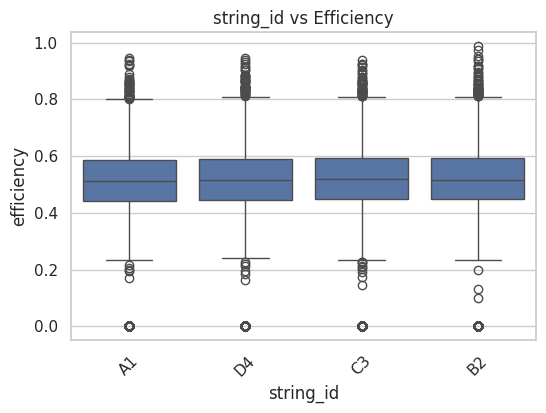

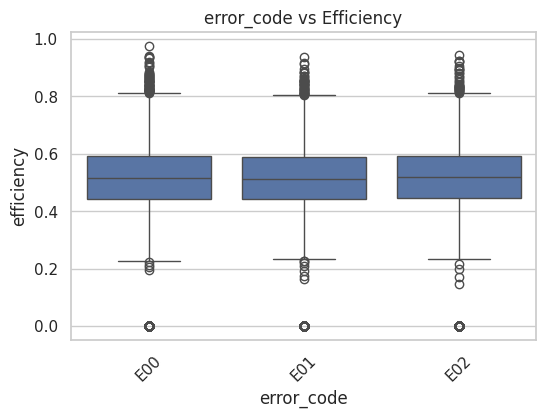

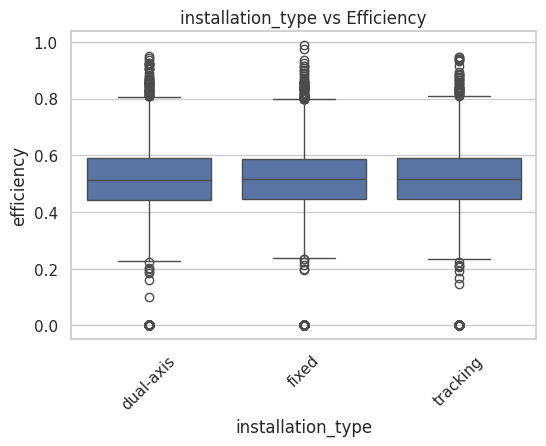

In [89]:
for col in cat_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=train, x=col, y='efficiency')
    plt.title(f"{col} vs Efficiency")
    plt.xticks(rotation=45)
    plt.show()

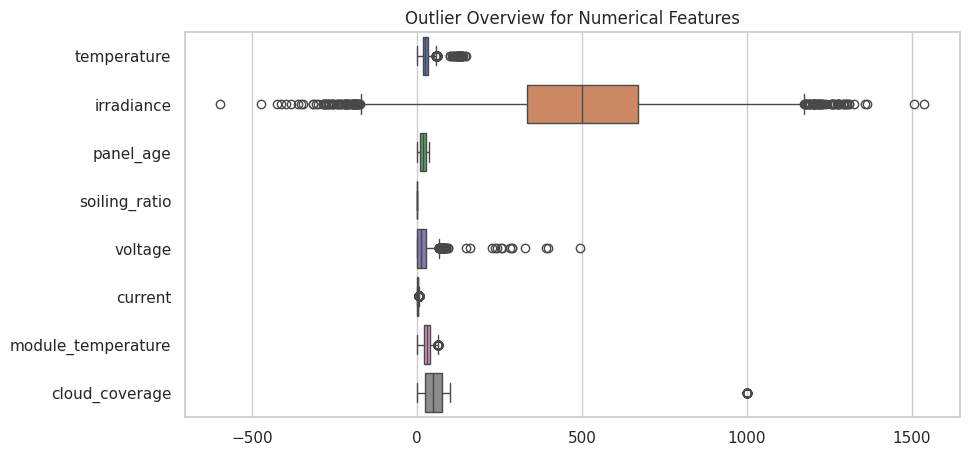

In [90]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=train[num_cols], orient='h')
plt.title("Outlier Overview for Numerical Features")
plt.show()

<ipython-input-91-dfe18beffd20>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train, x="panel_age", y="efficiency", ci=None)


Text(0.5, 1.0, 'Maintenance Count vs Efficiency')

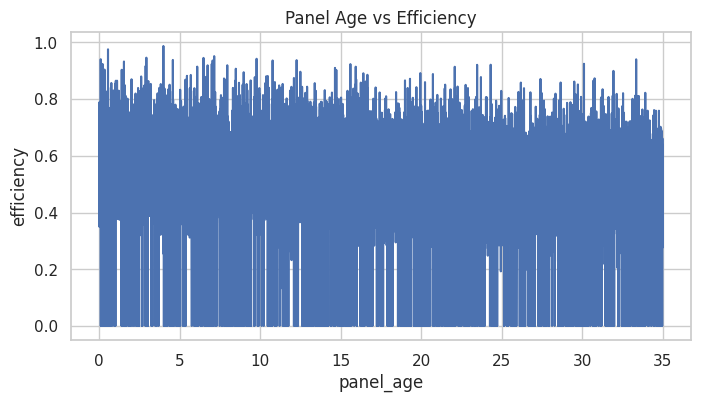

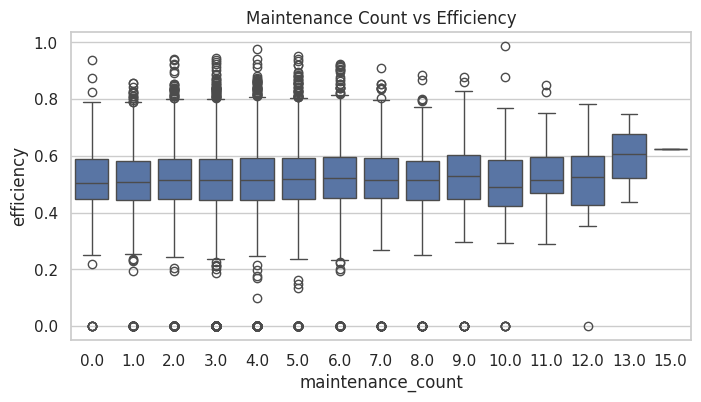

In [91]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=train, x="panel_age", y="efficiency", ci=None)
plt.title("Panel Age vs Efficiency")

plt.figure(figsize=(8, 4))
sns.boxplot(data=train, x="maintenance_count", y="efficiency")
plt.title("Maintenance Count vs Efficiency")


###**Converting invalid entries to NaN**
#**And columns with object type to be in numeric changed to Numeric**
#**Handling the missing**


In [92]:

# Copying original data
df_cleaned = train.copy()

# Step 1: Convert invalid 'object' entries to NaN and convert to numeric
invalid_entries = ['unknown', 'badval', 'UNK']

# Columns that should be numeric but are of object type
object_cols_to_numeric = ['humidity', 'wind_speed', 'pressure']
for col in object_cols_to_numeric:
    df_cleaned[col] = df_cleaned[col].replace(invalid_entries, np.nan)
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Step 2: Handle missing values
# Numeric columns → use median imputation
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

# Categorical columns → use mode imputation
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

# Verify cleaning
df_cleaned.info(), df_cleaned.isna().sum().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20000 non-null  int64  
 1   temperature         20000 non-null  float64
 2   irradiance          20000 non-null  float64
 3   humidity            20000 non-null  float64
 4   panel_age           20000 non-null  float64
 5   maintenance_count   20000 non-null  float64
 6   soiling_ratio       20000 non-null  float64
 7   voltage             20000 non-null  float64
 8   current             20000 non-null  float64
 9   module_temperature  20000 non-null  float64
 10  cloud_coverage      20000 non-null  float64
 11  wind_speed          20000 non-null  float64
 12  pressure            20000 non-null  float64
 13  string_id           20000 non-null  object 
 14  error_code          20000 non-null  object 
 15  installation_type   20000 non-null  object 
 16  effi

(None, np.int64(0))

# **checking the good imputing technique**


In [93]:
#checking the good imputing technique

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error

# Let's first simulate missing values in a subset to compare imputation strategies.
df_impute_test = df_cleaned.copy()

# Reintroduce 5% missing values randomly in the previously cleaned numeric columns for testing imputers
np.random.seed(42)
for col in ['humidity', 'wind_speed', 'pressure']:
    missing_indices = np.random.choice(df_impute_test.index, size=int(0.05 * len(df_impute_test)), replace=False)
    df_impute_test.loc[missing_indices, col] = np.nan

# Split numeric and categorical
numeric_cols = ['humidity', 'wind_speed', 'pressure']
categorical_cols = ['string_id', 'error_code', 'installation_type']

# Prepare target for error analysis (original values before missing introduced)
# --> FIX: Get true_values from the df_cleaned dataframe instead of the original train dataframe
# This ensures the problematic strings are already handled (converted to NaN in df_cleaned)
mask_missing = df_impute_test[numeric_cols].isna().any(axis=1)
true_values = df_cleaned.loc[mask_missing, numeric_cols].copy()

# Imputation 1: SimpleImputer with Median
median_imputer = SimpleImputer(strategy='median')
median_imputed = df_impute_test.copy()
median_imputed[numeric_cols] = median_imputer.fit_transform(median_imputed[numeric_cols])

# Imputation 2: KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
knn_imputed = df_impute_test.copy()
knn_imputed[numeric_cols] = knn_imputer.fit_transform(knn_imputed[numeric_cols])

# Compare RMSE of imputations against original values

# Only compare where NaNs were introduced
# The mask_missing is already defined above

median_values = median_imputed.loc[mask_missing, numeric_cols]
knn_values = knn_imputed.loc[mask_missing, numeric_cols]

median_rmse = np.sqrt(mean_squared_error(true_values, median_values))
knn_rmse = np.sqrt(mean_squared_error(true_values, knn_values))

print(median_rmse, knn_rmse)

10.371537023225194 11.406840537660708


# **Since we have median_rmse as low we proceed with median:**

# **Checking Correlation after Converting required columns from Object to numeric datatype**

Text(0.5, 1.0, 'Correlation Heatmap After Cleaning')

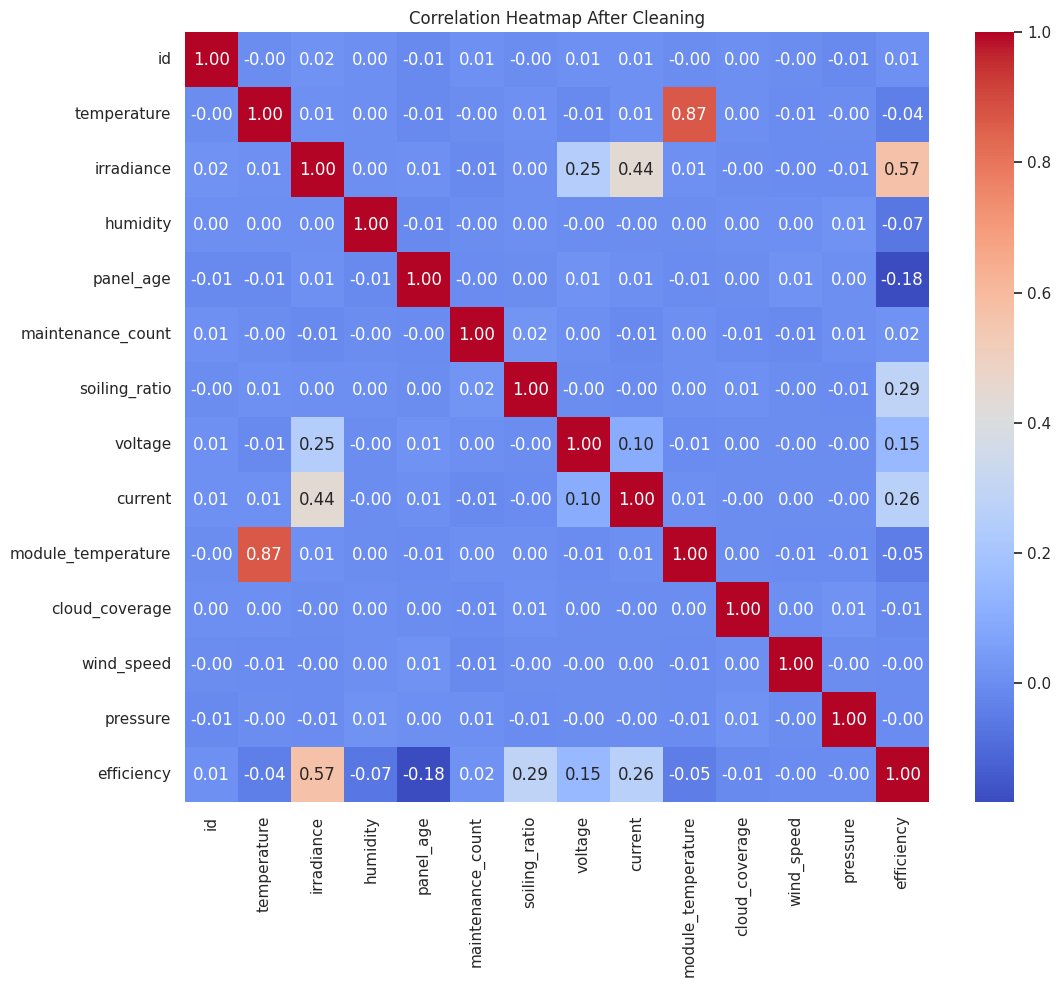

In [94]:
plt.figure(figsize=(12, 10))
corr = df_cleaned.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap After Cleaning")

In [95]:
#reduce the dataset
cols_to_drop = [
    'humidity',
    'temperature',
    'maintenance_count',
    'cloud_coverage',
    'wind_speed',
    'pressure'
]

df_cleaned_reduced = df_cleaned.drop(columns=cols_to_drop)
df_cleaned_reduced.head(10)

,id,irradiance,panel_age,soiling_ratio,voltage,current,module_temperature,string_id,error_code,installation_type,efficiency
0,0,576.179270,32.135501,0.803199,37.403527,1.963787,13.691147,A1,E00,tracking,0.562096
1,1,240.003973,19.977460,0.479456,21.843315,0.241473,27.545096,D4,E00,dual-axis,0.396447
2,2,687.612799,1.496401,0.822398,48.222882,4.191800,43.363708,C3,E00,tracking,0.573776
3,3,735.141179,18.491582,0.837529,46.295748,0.960567,57.720436,A1,E00,dual-axis,0.629009
4,4,12.241203,30.722697,0.551833,0.000000,0.898062,6.786263,B2,E00,fixed,0.341874
5,5,174.455123,29.853202,0.962880,5.356320,2.878068,19.392300,C3,E00,tracking,0.376127
6,6,531.960101,20.672099,0.911821,0.706348,2.131411,26.521808,A1,E00,fixed,0.537196
7,7,420.939352,4.106320,0.528694,13.228523,3.299236,58.884800,C3,E01,dual-axis,0.466850
8,8,495.799711,12.029813,0.684327,19.976573,3.255725,30.639338,C3,E00,dual-axis,0.538600
9,9,286.739018,34.621777,0.835760,1.670913,0.351423,49.297454,C3,E02,tracking,0.379771


In [117]:
df_cleaned_reduced.columns
# assert 'efficiency' in df_cleaned_reduced.columns

Index(['id', 'irradiance', 'panel_age', 'soiling_ratio', 'voltage', 'current',
       'module_temperature', 'string_id', 'error_code', 'installation_type',
       'efficiency'],
      dtype='object')

In [119]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df_cleaned_reduced, columns=['string_id', 'error_code', 'installation_type'], drop_first=True)
df_encoded.head(10)

,id,irradiance,panel_age,soiling_ratio,voltage,current,module_temperature,efficiency,string_id_B2,string_id_C3,string_id_D4,error_code_E01,error_code_E02,installation_type_fixed,installation_type_tracking
0,0,576.179270,32.135501,0.803199,37.403527,1.963787,13.691147,0.562096,False,False,False,False,False,False,True
1,1,240.003973,19.977460,0.479456,21.843315,0.241473,27.545096,0.396447,False,False,True,False,False,False,False
2,2,687.612799,1.496401,0.822398,48.222882,4.191800,43.363708,0.573776,False,True,False,False,False,False,True
3,3,735.141179,18.491582,0.837529,46.295748,0.960567,57.720436,0.629009,False,False,False,False,False,False,False
4,4,12.241203,30.722697,0.551833,0.000000,0.898062,6.786263,0.341874,True,False,False,False,False,True,False
5,5,174.455123,29.853202,0.962880,5.356320,2.878068,19.392300,0.376127,False,True,False,False,False,False,True
6,6,531.960101,20.672099,0.911821,0.706348,2.131411,26.521808,0.537196,False,False,False,False,False,True,False
7,7,420.939352,4.106320,0.528694,13.228523,3.299236,58.884800,0.466850,False,True,False,True,False,False,False
8,8,495.799711,12.029813,0.684327,19.976573,3.255725,30.639338,0.538600,False,True,False,False,False,False,False
9,9,286.739018,34.621777,0.835760,1.670913,0.351423,49.297454,0.379771,False,True,False,False,True,False,True


# **Since We Completed encoding of train data now we have to apply cleaning and preprocessing on test data**

# **TEST DATA CLEANING**

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  12000 non-null  int64  
 1   temperature         11418 non-null  float64
 2   irradiance          11385 non-null  float64
 3   humidity            12000 non-null  object 
 4   panel_age           11393 non-null  float64
 5   maintenance_count   11391 non-null  float64
 6   soiling_ratio       11390 non-null  float64
 7   voltage             11453 non-null  float64
 8   current             11413 non-null  float64
 9   module_temperature  11420 non-null  float64
 10  cloud_coverage      11418 non-null  float64
 11  wind_speed          12000 non-null  object 
 12  pressure            12000 non-null  object 
 13  string_id           12000 non-null  object 
 14  error_code          8389 non-null   object 
 15  installation_type   9021 non-null   object 
dtypes: f

In [ ]:
test.dtypes[:]

,0
id,int64
temperature,float64
irradiance,float64
humidity,object
panel_age,float64
maintenance_count,float64
soiling_ratio,float64
voltage,float64
current,float64
module_temperature,float64


# **Converting object data types to numeric from Test data**

In [100]:
# Copying original data
df_cleaned_test = test.copy()

# Step 1: Convert invalid 'object' entries to NaN and convert to numeric
invalid_entries = ['unknown', 'badval', 'UNK']

# Columns that should be numeric but are of object type
object_cols_to_numeric = ['humidity', 'wind_speed', 'pressure']
for col in object_cols_to_numeric:
    df_cleaned_test[col] = df_cleaned_test[col].replace(invalid_entries, np.nan)
    df_cleaned_test[col] = pd.to_numeric(df_cleaned_test[col], errors='coerce')


In [101]:
df_cleaned_test.dtypes[:]

,0
id,int64
temperature,float64
irradiance,float64
humidity,float64
panel_age,float64
maintenance_count,float64
soiling_ratio,float64
voltage,float64
current,float64
module_temperature,float64


# **Cleaning all test data for numerical and object type too**

In [104]:
# Step 2: Fill missing values
# Use median from TRAINING data to avoid leakage for numerical data
numeric_cols = df_cleaned_test.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    median_value = df_cleaned[col].median()  # from TRAIN data
    df_cleaned_test[col] = df_cleaned_test[col].fillna(median_value)

# For categorical columns, fill with mode (from train)
categorical_cols_test = df_cleaned_test.select_dtypes(include=['object']).columns
for col in categorical_cols_test:
    # if col in df_cleaned_test.columns:
    df_cleaned_test[col] = df_cleaned_test[col].fillna(df_cleaned[col].mode()[0])
df_cleaned_test.info(), df_cleaned_test.isna().sum().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  12000 non-null  int64  
 1   temperature         12000 non-null  float64
 2   irradiance          12000 non-null  float64
 3   humidity            12000 non-null  float64
 4   panel_age           12000 non-null  float64
 5   maintenance_count   12000 non-null  float64
 6   soiling_ratio       12000 non-null  float64
 7   voltage             12000 non-null  float64
 8   current             12000 non-null  float64
 9   module_temperature  12000 non-null  float64
 10  cloud_coverage      12000 non-null  float64
 11  wind_speed          12000 non-null  float64
 12  pressure            12000 non-null  float64
 13  string_id           12000 non-null  object 
 14  error_code          12000 non-null  object 
 15  installation_type   12000 non-null  object 
dtypes: f

(None, np.int64(0))

# **Reducing the Columns for Test data**

In [105]:
#reduce the dataset
# cols_to_drop = [
#     'humidity',
#     'temperature',
#     'maintenance_count',
#     'cloud_coverage',
#     'wind_speed',
#     'pressure'
# ]

df_cleaned_reduced_test = df_cleaned_test.drop(columns=cols_to_drop)
df_cleaned_reduced_test.head(10)

,id,irradiance,panel_age,soiling_ratio,voltage,current,module_temperature,string_id,error_code,installation_type
0,0,85.449838,13.910963,0.889765,6.370396,0.069101,19.517274,C3,E01,tracking
1,1,722.801748,20.916528,0.590372,30.095867,1.713852,37.421443,D4,E00,tracking
2,2,485.491998,1.446962,0.611425,28.424430,1.696936,32.147763,D4,E01,dual-axis
3,3,350.022720,18.810133,0.697663,7.848038,0.787188,25.734118,C3,E02,dual-axis
4,4,437.295622,17.497731,0.564938,12.300717,1.867620,29.857669,B2,E00,fixed
5,5,759.192697,27.231179,0.953422,20.353573,1.426782,14.563757,A1,E01,tracking
6,6,682.810129,13.535659,0.748115,12.350138,0.362109,19.292288,C3,E00,tracking
7,7,468.019135,27.584920,0.697663,0.003959,0.128387,45.968299,D4,E02,tracking
8,8,215.223134,8.584418,0.697663,26.510237,1.589784,8.146866,A1,E00,tracking
9,9,499.654730,24.897915,0.524393,22.708945,0.697054,37.941231,C3,E00,tracking


In [106]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical columns
test_encoded = pd.get_dummies(df_cleaned_reduced_test, columns=['string_id', 'error_code', 'installation_type'], drop_first=True)
test_encoded.head(10)

,id,irradiance,panel_age,soiling_ratio,voltage,current,module_temperature,string_id_B2,string_id_C3,string_id_D4,error_code_E01,error_code_E02,installation_type_fixed,installation_type_tracking
0,0,85.449838,13.910963,0.889765,6.370396,0.069101,19.517274,False,True,False,True,False,False,True
1,1,722.801748,20.916528,0.590372,30.095867,1.713852,37.421443,False,False,True,False,False,False,True
2,2,485.491998,1.446962,0.611425,28.424430,1.696936,32.147763,False,False,True,True,False,False,False
3,3,350.022720,18.810133,0.697663,7.848038,0.787188,25.734118,False,True,False,False,True,False,False
4,4,437.295622,17.497731,0.564938,12.300717,1.867620,29.857669,True,False,False,False,False,True,False
5,5,759.192697,27.231179,0.953422,20.353573,1.426782,14.563757,False,False,False,True,False,False,True
6,6,682.810129,13.535659,0.748115,12.350138,0.362109,19.292288,False,True,False,False,False,False,True
7,7,468.019135,27.584920,0.697663,0.003959,0.128387,45.968299,False,False,True,False,True,False,True
8,8,215.223134,8.584418,0.697663,26.510237,1.589784,8.146866,False,False,False,False,False,False,True
9,9,499.654730,24.897915,0.524393,22.708945,0.697054,37.941231,False,True,False,False,False,False,True


In [107]:
test_encoded.head(5)

,id,irradiance,panel_age,soiling_ratio,voltage,current,module_temperature,string_id_B2,string_id_C3,string_id_D4,error_code_E01,error_code_E02,installation_type_fixed,installation_type_tracking
0,0,85.449838,13.910963,0.889765,6.370396,0.069101,19.517274,False,True,False,True,False,False,True
1,1,722.801748,20.916528,0.590372,30.095867,1.713852,37.421443,False,False,True,False,False,False,True
2,2,485.491998,1.446962,0.611425,28.424430,1.696936,32.147763,False,False,True,True,False,False,False
3,3,350.022720,18.810133,0.697663,7.848038,0.787188,25.734118,False,True,False,False,True,False,False
4,4,437.295622,17.497731,0.564938,12.300717,1.867620,29.857669,True,False,False,False,False,True,False


In [61]:
test_encoded_indexing = test_encoded.reindex(columns=df_encoded.columns,fill_value=0)
test_encoded_indexing.head(5)

,id,irradiance,panel_age,soiling_ratio,voltage,current,module_temperature,string_id_B2,string_id_C3,string_id_D4,error_code_E01,error_code_E02,installation_type_fixed,installation_type_tracking
0,0,85.449838,13.910963,0.889765,6.370396,0.069101,19.517274,False,True,False,True,False,False,True
1,1,722.801748,20.916528,0.590372,30.095867,1.713852,37.421443,False,False,True,False,False,False,True
2,2,485.491998,1.446962,0.611425,28.424430,1.696936,32.147763,False,False,True,True,False,False,False
3,3,350.022720,18.810133,0.697663,7.848038,0.787188,25.734118,False,True,False,False,True,False,False
4,4,437.295622,17.497731,0.564938,12.300717,1.867620,29.857669,True,False,False,False,False,True,False


#**Now Start Modelling**
#**Define Features and Target**

In [58]:
df_encoded.columns

Index(['id', 'irradiance', 'panel_age', 'soiling_ratio', 'voltage', 'current',
       'module_temperature', 'string_id_B2', 'string_id_C3', 'string_id_D4',
       'error_code_E01', 'error_code_E02', 'installation_type_fixed',
       'installation_type_tracking'],
      dtype='object')

In [125]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['efficiency', 'id'])
y = df_encoded['efficiency']

## **Train-Test Split**

In [138]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


## **Checking For Best Model by R^2 and RMSE**

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    r2 = r2_score(y_val, preds)
    print(f"{name} -> RMSE: {rmse:.4f}, R²: {r2:.4f}")


Linear Regression -> RMSE: 0.1084, R²: 0.4155
Random Forest -> RMSE: 0.1098, R²: 0.3999
Gradient Boosting -> RMSE: 0.1064, R²: 0.4364


# **Since Gradient Boosting is Good as less RMSE and R^2 closer to 1 we do:**
# **Final Modeling with Gradient Boosting**

In [139]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 🔹 Model: Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# 🔹 Predictions and Evaluation
y_pred  = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)
score = 100 * (1 - rmse)

print(f"📊 RMSE: {rmse:.4f}")
print(f"📈 R² Score: {r2:.4f}")
print(f"✅ Final Project Score: {score:.2f}")


📊 RMSE: 0.1064
📈 R² Score: 0.4364
✅ Final Project Score: 89.36


In [140]:
model.fit(X, y)

GradientBoostingRegressor(random_state=42)

In [141]:
X_test = test_encoded_indexing.drop('id', axis=1)

test_preds = model.predict(X_test)

In [142]:
submission = pd.DataFrame({
    'id': test['id'],
    'efficiency': test_preds
})
submission.to_csv('submission.csv', index=False)
